# Exercise 06: Scatter Matrix

Подключаемся к базе данных

In [9]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

connection = sqlite3.connect("../data/checking-logs.sqlite")

Работаем с датафреём и выделяем необходимые данные

In [10]:
views_diff = pd.io.sql.read_sql(""" 
SELECT 
    t.uid,
    AVG((CAST(strftime('%s', first_commit_ts) AS INT) - deadlines) / 3600) as avg_diff,
    COUNT(*) as pageviews         
FROM test t LEFT JOIN deadlines d ON d.labs = t.labname
LEFT JOIN pageviews ON t.uid = pageviews.uid
WHERE t.labname != 'project1'
GROUP BY t.uid

""",
connection)


commits = pd.io.sql.read_sql(""" 
SELECT 
    uid, COUNT(*) as num_commits
FROM checker c
WHERE c.labname != 'project1'
GROUP BY uid
""",
connection)


df = views_diff.merge(commits, on='uid', how='inner') 
df.count()


uid            11
avg_diff       11
pageviews      11
num_commits    11
dtype: int64

С помощью метода .plot() в Pandas создаём график

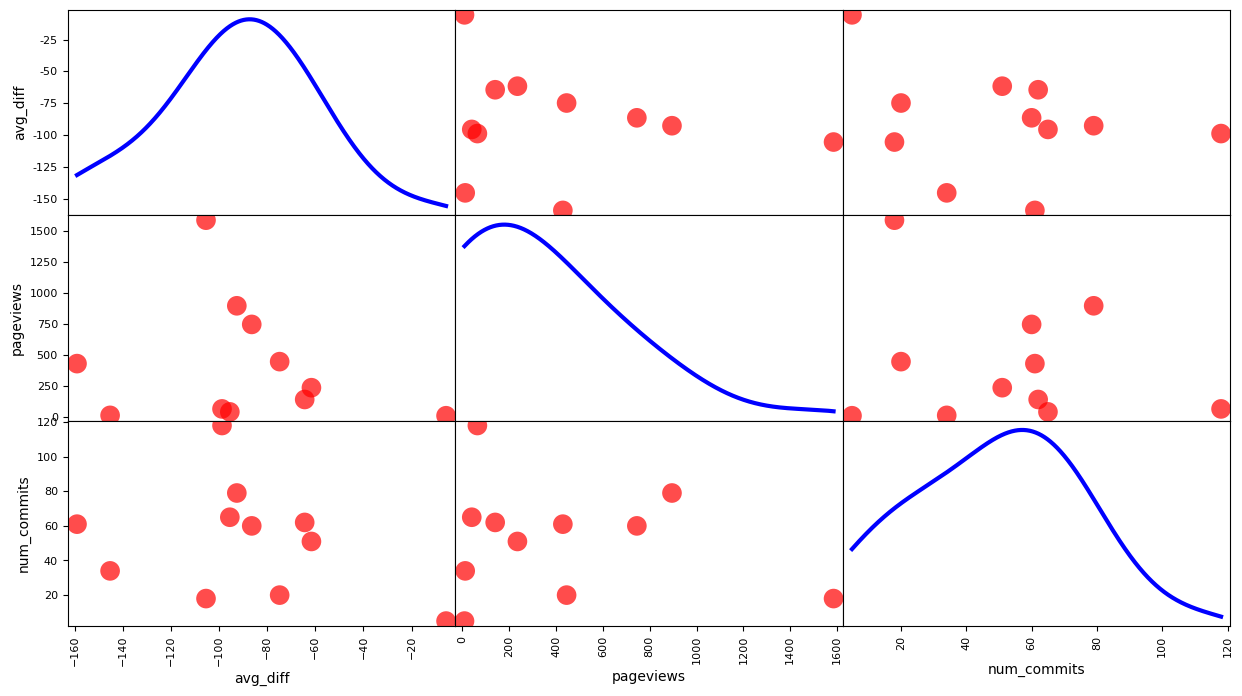

In [11]:
axes = scatter_matrix(
    df,
    diagonal='kde',
    figsize=(15, 8),
    alpha=0.7,
    marker='o',
    s=200,
    color='red',   
)

for ax in axes.diagonal():
    for line in ax.get_lines():
        line.set_linewidth(3)
        line.set_color('blue') 

Закрываем соединение с базой данных

In [12]:
connection.close()

Можем ли мы сказать, что если у пользователя мало просмотров страниц, то у него, вероятно, мало коммитов? 

Ответ: `нет`

Можем ли мы сказать, что если у пользователя небольшое количество просмотров страниц, то у него, вероятно, небольшая средняя разница между первой фиксацией и крайним сроком лабораторной работы?

Ответ: `нет`

Можем ли мы сказать, что есть много пользователей с низким количеством коммитов и несколько с большим количеством коммитов?

Ответ: `да`

Можем ли мы сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей?

Ответ: `нет`